### 1. En el siguiente link se encuentra un data set y la descripción del mismo. La tarea es

a. Un análisis exploratorio de los datos

b. Implementar un modelo predictivo sobre los datos. 

http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/

Adjuntar la implementación del modelo, resultados de precisión y una justificación del por qué eligió ese modelo y que tan propenso es a overfitting.

### 2. Sistema de Recomendación Hipotético: Actualmente en Rappi contamos con una sección de "Favoritos" para los usuarios que se basa en el histórico de compra. Sin embargo, deseamos experimentar con una sección similar de "Recomendados" similar a Amazon.

Tenemos la hipótesis que un sistema de recomendación tradicional no nos funcionaria. Primero por el volumen de datos, contamos con alrededor de 1M de usuarios y cerca a 1M de productos distintos, lo que resultaría matrices de 1M x 1M y suponiendo operaciones matriciales estándar eso se traduciría en alrededor de 1e36 operaciones para calcular un vector de recomendados para todos los usuarios.

Sugiera una solución alternativa para desarrollar una sección de recomendados O sugiera mejoras al sistema de recomendación estándar para que sea factible su implementación. Que tecnologías usuaria? Que algoritmos? Que mecanismo propone para mitigar impactos de rendimiento en las bases de datos y/o servidores?

### 3. Basado en el problema anterior. Suponiendo que el scoring o calificación de un usuario a un producto es la cantidad/frecuencia con la que dicho usuario compra un producto, que modelos de predicción o métodos de estimación usaría para calcular/estimar el scoring que un usuario daría a un producto que nunca ha comprado/visto.

In [1]:
import pandas as pd
import numpy as np

## 1.
## Se carga la base de datos

In [2]:

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz',header=None)

## se hace for para asignar los nombres debido a que los ultimos datos tienen multiples datos asociados

In [3]:
# 'Wilderness_Area (4 binary columns)',
# 'Soil_Type (40 binary columns)',
# 'Cover_Type (7 types)


names=['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
'Hillshade_9am',
'Hillshade_Noon',
'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points']

for i in range(4):
    names.append('Wilderness_Area{}'.format(i+1))
for i in range(40):
    names.append('Soil_Type{}'.format(i+1))
names.append('Cover_Type')


data.columns=names

In [4]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## se visualiza estadistica de la base de datos 

In [5]:
pd.set_option('display.max_columns', None)
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## se realiza un correlación para verificar la relacion entre las variables y determinar su importancia como parametro

In [6]:
datos_correlacion=data.corr()
datos_correlacion

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.204512,-0.187677,-0.182463,-0.183521,-0.150376,-0.214606,-0.002252,-0.003021,-0.060915,-0.428746,-0.134227,-0.118905,-0.043984,-0.080825,-0.007153,-0.059446,-0.111028,-0.081811,0.033144,-0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,-0.016657,0.035254,-0.029270,0.074327,-0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,-0.007574,-0.005649,-0.002730,0.017212,0.008938,0.010766,-0.005052,-0.003366,-0.020800,0.049835,-0.064344,-0.070209,0.054544,0.007597,-0.002660,0.007846,-0.000168,-0.028353,-0.003635,-0.029440,0.032998,0.021578,0.013676,0.018164,-0.003265,-0.010661,0.011328,0.027535,-0.062181,-0.028922,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.107847,-0.018553,0.125497,0.131847,0.072311,0.003673,-0.015661,-0.023359,-0.032752,0.244037,-0.050894,-0.169300,0.192423,0.000228,0.001081,-0.034791,-0.040208,-0.045851,-0.083743,-0.077582,-0.025461,-0.053396,-0.207397,0.082434,0.026364,-0.021449,0.043695,0.067052,-0.082941,0.075864,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.035096,-0.011569,-0.041211,-0.049071,-0.009370,-0.012916,0.004751,-0.000795,-0.021935,-0.071653,0.001399,0.014628,-0.002032,-0.038478,-0.002667,-0.067448,-0.071435,-0.013340,-0.043236,-0.078088,-0.039953,-0.051424,-0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,-0.001025,-0.049960,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,-0.008485,-0.012915,-0.028476,0.055154,-0.020870,-0.044526,0.083482,-0.024281,-0.001744,-0.050909,-0.054191,-0.031692,-0.055635,-0.076727,-0.026116,-0.075679,-0.180098,0.037066,-0.013471,-0.011212,0.067086,0.071672,-0.075860,-0.011901,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.083585,-0.088026,-0.084988,-0.088524,-0.061607,-0.108328,0.020107,0.025805,-0.045813,-0.182955,-0.099293,0.054196,-0.054968,-0.033945,-0.003144,0.018083,-0.051825,-0.051243,0.068758,0.056595,-0.014890,0.046979,-0.007067,-0.032451,-0.034842,0.002521,0.003866,-0.032749,0.306324,0.077091,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450

## se hace un mapa de calor de las caracteristicas

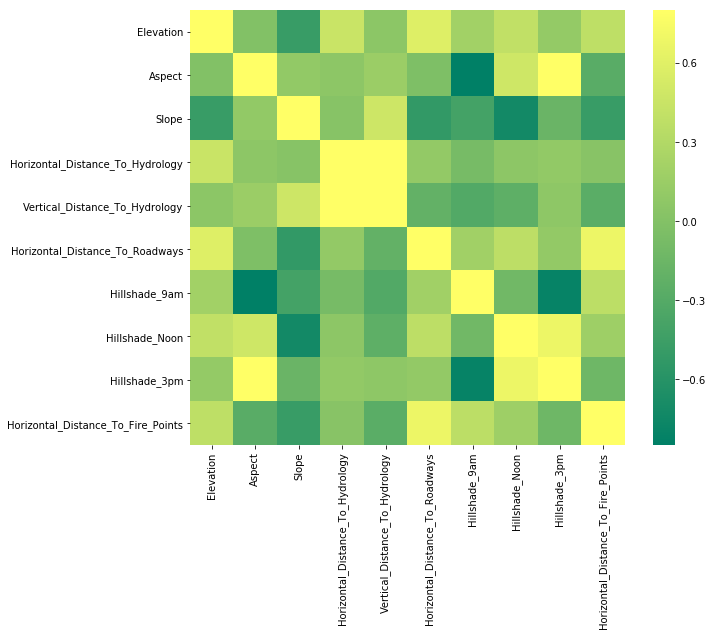

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


mayaDeCorrelacion = datos_correlacion.iloc[:,:10].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(mayaDeCorrelacion,vmax=0.8,square=True,cmap='summer');

## se filtran los datos con mayor correlacion a partir de 50% 

In [8]:

correlacion = []
for i in range(0, 10):
    for j in range(i+1, 10):
        if datos_correlacion.iloc[i,j]>= 0.5 and datos_correlacion.iloc[i,j]<1\
        or datos_correlacion.iloc[i,j] <0 and datos_correlacion.iloc[i,j]<=-0.5:
            correlacion.append([datos_correlacion.iloc[i,j],i,j])
correlacion

[[-0.57927291094055477, 1, 6],
 [0.64694395349565814, 1, 8],
 [-0.52691063966309415, 2, 7],
 [0.60623550595892295, 3, 4],
 [-0.78029595228057247, 6, 8],
 [0.59427364803735461, 7, 8]]

## se organizan las correlaciones y se presentan las variables que presentan mas correlacion anteriormente filtradas como relaciones directas o inversas

In [9]:

correlacionOrganizada = sorted(correlacion,key= lambda x: -abs(x[0]))

for cor,i,j in correlacionOrganizada:
    if cor<0:
        print("relacion inversa entre {} y {} = {:4.2f}".format(data.columns[i], data.columns[j], cor))
    elif cor>0:
        print("relacion directa entre {} y {} = {:4.2f}".format(data.columns[i], data.columns[j], cor))

relacion inversa entre Hillshade_9am y Hillshade_3pm = -0.78
relacion directa entre Aspect y Hillshade_3pm = 0.65
relacion directa entre Horizontal_Distance_To_Hydrology y Vertical_Distance_To_Hydrology = 0.61
relacion directa entre Hillshade_Noon y Hillshade_3pm = 0.59
relacion inversa entre Aspect y Hillshade_9am = -0.58
relacion inversa entre Slope y Hillshade_Noon = -0.53


## Visualizacion de los datos correlacionados

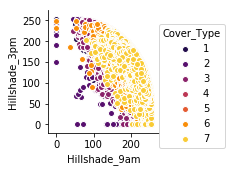

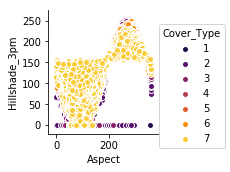

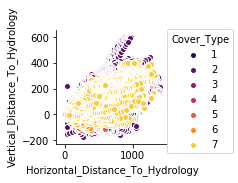

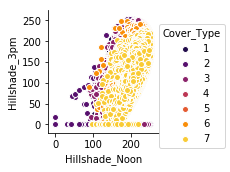

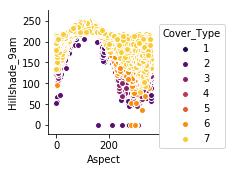

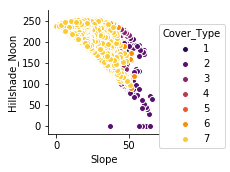

In [10]:
for cor,i,j in correlacionOrganizada:
    sns.pairplot(data = data, hue='Cover_Type', x_vars=data.columns[i], y_vars=data.columns[j],palette='inferno')
    plt.show()

## muchos de los soil types no tienen incidencia con los conver types, se visualiza con el conteo de valores para cada columna en los soil unicamente

In [11]:
for i in range(14,55):
    print(data[data.columns[i]].value_counts())

0    577981
1      3031
Name: Soil_Type1, dtype: int64
0    573487
1      7525
Name: Soil_Type2, dtype: int64
0    576189
1      4823
Name: Soil_Type3, dtype: int64
0    568616
1     12396
Name: Soil_Type4, dtype: int64
0    579415
1      1597
Name: Soil_Type5, dtype: int64
0    574437
1      6575
Name: Soil_Type6, dtype: int64
0    580907
1       105
Name: Soil_Type7, dtype: int64
0    580833
1       179
Name: Soil_Type8, dtype: int64
0    579865
1      1147
Name: Soil_Type9, dtype: int64
0    548378
1     32634
Name: Soil_Type10, dtype: int64
0    568602
1     12410
Name: Soil_Type11, dtype: int64
0    551041
1     29971
Name: Soil_Type12, dtype: int64
0    563581
1     17431
Name: Soil_Type13, dtype: int64
0    580413
1       599
Name: Soil_Type14, dtype: int64
0    581009
1         3
Name: Soil_Type15, dtype: int64
0    578167
1      2845
Name: Soil_Type16, dtype: int64
0    577590
1      3422
Name: Soil_Type17, dtype: int64
0    579113
1      1899
Name: Soil_Type18, dtype: int64
0

## a partir de lo anterior se nota que el Soil type 14 solo tiene 3 datos asociados al conver type y se procede a eliminarlo de la base de datos, y se evalua la oblicuidad de los datos para verificar el zero mean y mejorar el rendimiento del entremaniento del modelo

In [12]:
#el 14 tiene pocos valores que inciden el cover type solo tiene 3
data = data.drop(['Soil_Type14'], axis=1)
data.iloc[:,:10].skew()

Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Horizontal_Distance_To_Hydrology      1.140437
Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    1.288644
dtype: float64

## al ver que hay varias variables que se alejan del cero, se hace una reduccion aplicando la raiz cuadrada a los valore, Nota: algunos valores negativos generan el warning que se muestra al intentar generar numeros imaginarios que no soporta

In [13]:
dataN=data
dataN['Horizontal_Distance_To_Hydrology'] = np.sqrt(dataN['Horizontal_Distance_To_Hydrology'])
dataN['Vertical_Distance_To_Hydrology'] = np.sqrt(dataN['Vertical_Distance_To_Hydrology'])
dataN['Horizontal_Distance_To_Fire_Points'] = np.sqrt(dataN['Horizontal_Distance_To_Fire_Points'])
dataN.iloc[:,:10].skew()

C:\Users\mirac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Horizontal_Distance_To_Hydrology      0.006737
Vertical_Distance_To_Hydrology        0.466950
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    0.416731
dtype: float64

## se eliminan los valores vacios o NaN

In [14]:
datatest=dataN.fillna(0)

In [15]:
from sklearn import ensemble
from sklearn import cross_validation
from sklearn import metrics

C:\Users\mirac\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## se evalua un primer modelo basado en los mejores resultados obtenidos en la prueba de Kaggle, como se muestra en el articulo http://www-di.inf.puc-rio.br/~milidiu/inf2979/anteprojetos/gribel.pdf, donde se presenta al random forest como un prototipo de modelo con buenos resultados

In [16]:
X=datatest.drop(['Cover_Type'],axis=1).values
y = datatest.Cover_Type.values

X,X_,y,y_ = cross_validation.train_test_split(X,y,test_size=0.2)

rf = ensemble.RandomForestClassifier()
rf.fit(X,y)
y_rf = rf.predict(X_)
print(metrics.classification_report(y_,y_rf))
print(metrics.accuracy_score(y_,y_rf))

             precision    recall  f1-score   support

          1       0.94      0.95      0.94     42067
          2       0.95      0.96      0.95     56835
          3       0.92      0.95      0.94      7192
          4       0.89      0.82      0.85       570
          5       0.94      0.72      0.82      1933
          6       0.91      0.85      0.88      3512
          7       0.98      0.93      0.95      4094

avg / total       0.94      0.94      0.94    116203

0.944252730136


## el resultado del random forest fue del 94% de score

In [17]:
from sklearn.neural_network import MLPRegressor

## se prueba con una regresion mediante un multilayer perceptron neural network  con 200 neuronas, y con un incremento en las iteraciones bastante grande pero con un resultado muy pobre, muy probablemente debido a un overfitting

In [18]:
rfnn=MLPRegressor(hidden_layer_sizes=(200),learning_rate_init=0.001,learning_rate='adaptive',early_stopping=True,max_iter=20000)
rfnn.fit(X,y)
rfnn.score(X_,y_)

0.16687166235043893

## el tercer modelo que se prueba es mediante un gradint boost regressor, con un resultado medianamente aceptable pero probablemente hay que ajustar mas los parametros para lograr un equilibrio bias /variance

In [19]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X, y)
clf.score(X_,y_)


0.65385805978702849

## por ultimo se intenta con una deep net con dropout y funcion de activacion relu, aplicando el learning deacay, pero no se mejora el rendimiento, hay que determinar mejor la arquitectura o probar con una convolucional

In [20]:

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

no_hl1=200
no_hl2=100
no_hl3=60
no_hl4=30
no_fl=1

model= Sequential()
model.add(Dense(no_hl1,input_shape=(53,),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(no_hl2,input_shape=(no_hl1,),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(no_hl3,input_shape=(no_hl2,),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(no_hl4,input_shape=(no_hl3,),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(no_fl))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               10800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1830      
__________

In [22]:
network_history=model.fit(X, y, validation_data = (X_, y_), epochs=60, 
          batch_size=100, verbose=True)

Train on 464809 samples, validate on 116203 samples
Epoch 1/60
464809/464809 [==============================] - 31s - loss: 3.0520 - acc: 0.3653 - val_loss: 3.0709 - val_acc: 0.3620
Epoch 2/60
464809/464809 [==============================] - 30s - loss: 3.0520 - acc: 0.3653 - val_loss: 3.0709 - val_acc: 0.3620
Epoch 3/60
464809/464809 [==============================] - 30s - loss: 3.0520 - acc: 0.3653 - val_loss: 3.0709 - val_acc: 0.3620
Epoch 4/60
464809/464809 [==============================] - 27s - loss: 3.0520 - acc: 0.3653 - val_loss: 3.0709 - val_acc: 0.3620
Epoch 5/60
464809/464809 [==============================] - 28s - loss: 3.0520 - acc: 0.3653 - val_loss: 3.0709 - val_acc: 0.3620
Epoch 6/60
464809/464809 [==============================] - 27s - loss: 3.0520 - acc: 0.3653 - val_loss: 3.0709 - val_acc: 0.3620
Epoch 7/60
464809/464809 [==============================] - 27s - loss: 3.0520 - acc: 0.3653 - val_loss: 3.0709 - val_acc: 0.3620
Epoch 8/60
464809/464809 [============

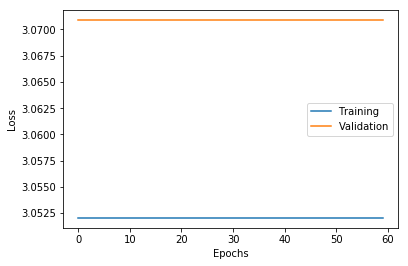

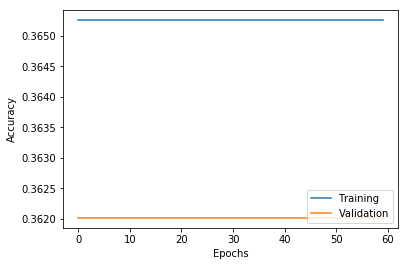

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

## se almacena el modelo con mejor respuesta, la cual tenia un score de 94%, y se evita el overfiting devido a que se genero la particion de la data con un crossvalidation

In [24]:
from sklearn.externals import joblib
joblib.dump(clf, 'modeloRandomForest.pkl') 

['modeloRandomForest.pkl']

## 2. sistema de recomendacion hipotetico

###  Para solucionar el problema de la matriz de usuarios por productos se utilizaría el algoritmo de “matrix factorization”, el cual reduce la cantidad de parámetros y se estimaría la cantidad de faltantes, los cuales serian los valores a predecir. Otra forma de trabajar menos información seria creando una Gereative Adversarial Network para que genere scores basados en usuarios que ya tienen históricos, y se ajustaría con la función de costos comparándola con la base de datos restante, por lo que con otras redes neuronales distribuidas se podría crear diferentes sistemas de recomendación que competirían entre sí.

### Para realizar el montaje de este sistema se podría Dockerizar cada red neuronal como microservios distribuidos, o intentarlo montar en un blockchain, o hacerlo floydhub.

### Se utilizaría Apache Spark para los requerimientos, Tensorflow para el modelo, y si es necesario dado el requerimiento Kafka, tener en cuenta balanceadores de carga para el servidor de la base de datos, y Redis o alguna base de datos de alto rendimiento.

### Considerero varias opciones debido a que importante prototipar y verificar el rendimiento del sistema antes de escalar y definir una arquitectura, incluso se podría utilizar API’s como Watson que tiene soporte pro PubNub, o Google Cloud.


## 3. 
### Si el usuario no ha comprado el producto y se quiere predecir, se estimaría con una matriz de co-ocurrencia para determinar la popularidad y evaluar la similitud con dicha matriz con el algoritmo de jaccard o con el “cosine similarity”, luego se podría hacer un clasificador como el KNN para estimar cual es el valor mas cercano y poder predecir.
